In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# AI Passport: Basic Sciences Assignment (Reveal Notebook)

## Instructions:
- This assignment is focused on the fundamental image processing concepts used in biomedical image analysis.
- You will answer questions related to Microskills 1 and 3.
- There are additional questions on rigor and reproducibility, as well as responsible conduct of research (RCR).

---

# Microskill 1: Landscape of Biomedical Imaging

## Problem 1.1: Simulating X-ray Attenuation

Different tissues absorb X-rays at different rates, which is the principle behind X-ray imaging.

### Task:
- Run the code below to plot a simple simulation of X-ray output with three different tissue types. 
- Describe how tissue contrast relates to X-ray attenuation. What kinds of materials appear brighter in an X-ray image? Darker? How might that relate to biology and anatomical structures?

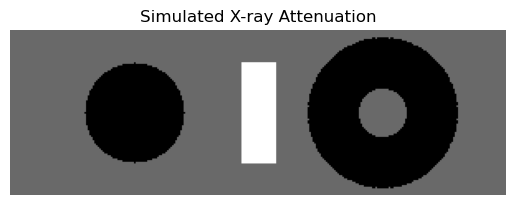

In [5]:
image = np.ones((100, 300), dtype=np.uint8) * 100  # gray background

# two circular, dark spots
cv2.circle(image, (75, 50), 30, 30, -1)  
cv2.circle(image, (225, 50), 30, 30, 30, -1)

# white rectangle in center of image
cv2.rectangle(image, (140, 20), (160, 80), 200, -1)

plt.imshow(image, cmap='gray')
plt.title("Simulated X-ray Attenuation")
plt.axis('off')
plt.show()

### Answer:
X-rays pass through the body and are absorbed (or attenuated) by different tissues depending on their density and atomic number. The amount of attenuation determines how bright or dark a region appears on the X-ray image.

High attenuation materials (e.g., bone with high calcium content) absorb more X-rays and allow fewer to reach the detector. They appear brighter (white) on the X-ray image.

Low attenuation materials (e.g., air in lungs) allow most X-rays to pass through - they appear darker (black) on the X-ray image.

Intermediate tissues like muscle, fat, or organs absorb X-rays to a moderate degree. They appear in shades of gray.

Biological Interpretation:

- Bones show up as bright white because they’re dense and highly attenuate X-rays.

- Lungs are mostly air-filled, appearing dark, which helps radiologists detect infiltrates or fluid buildup.

- Soft tissues such as liver, heart, or muscles appear in various gray levels based on their composition and density.



## Problem 1.2: Analyzing Pixel Intensity Histograms

Understanding the histogram of an image is critical for interpreting brightness and contrast.

### Task:
- Run the code to generate an intensity histogram of the simulated image from problem 1.1
- Identify the peaks and what tissues they might represent.

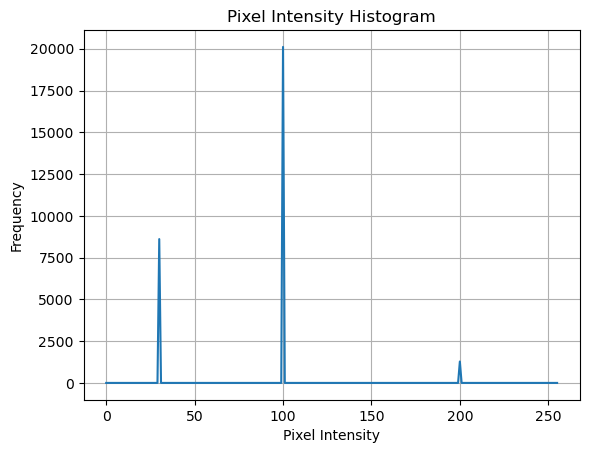

In [6]:
hist = cv2.calcHist([image], [0], None, [256], [0,256])
plt.plot(hist)
plt.title("Pixel Intensity Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Answer:
Three distinct peaks correspond to air (30), soft tissue (100), and bone (200).

# Microskill 3: Traditional Biomedical Image Analysis


## Problem 3.1: Comparing Edge Detection Algorithms

Edge detection helps identify boundaries in images, a core step in segmentation.

### Task:
- Run the code below to apply both the Sobel and Canny edge detectors to a noisy synthetic image.
- Compare their outputs in the text box provided


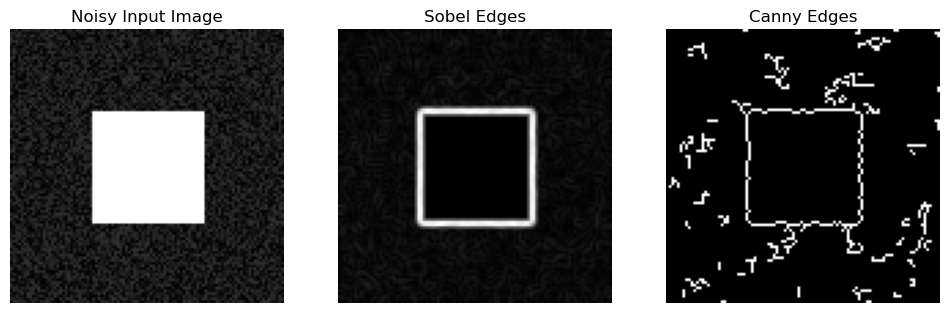

In [7]:
img = np.zeros((100, 100), dtype=np.uint8)
cv2.rectangle(img, (30, 30), (70, 70), 255, -1)
noise = np.random.randint(0, 50, (100, 100), dtype=np.uint8)
noisy_img = cv2.add(img, noise)

sobel_x = cv2.Sobel(noisy_img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(noisy_img, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

canny_edges = cv2.Canny(noisy_img, 100, 200)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edges")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

### Answer:
Sobel is more sensitive to noise, while Canny provides cleaner edges due to its built-in filtering and non-maximum suppression.

## Problem 3.2: Thresholding for Binary Segmentation

Simple thresholding can be used to segment foreground from background.

### Task:
- Run the cell below to apply Otsu's method to binarize the noisy rectangle image.
- Visualize and interpret the binary result.

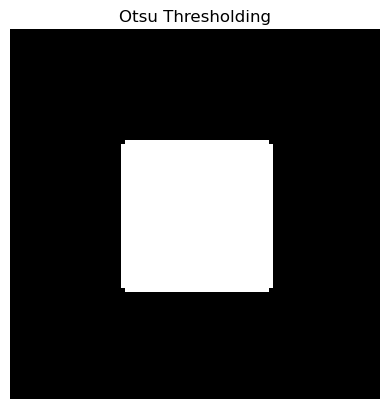

In [8]:
blurred = cv2.GaussianBlur(noisy_img, (5,5), 0)
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')
plt.show()


### Answer:
Otsu's method separates foreground (rectangle) from background even in noisy conditions by choosing an optimal threshold automatically.



# Rigor and Reproducibility Question


## Algorithm Evaluation

### Task:
- Explain why it's important to evaluate image processing algorithms on multiple datasets.
- Describe a scenario where a method performs well on one dataset but fails on another.

### Answer:
Evaluating on multiple datasets ensures generalizability. An algorithm trained on high-resolution MRI might fail on low-resolution ultrasound due to different noise patterns and contrasts.

# Responsible Conduct of Research (RCR)

## Open-Source Code and Citation Ethics

### Task:
- Discuss the ethical importance of citing open-source tools and code used in scientific research.
- Why is this essential for transparency and credit?

### Answer:
Failing to cite code undermines contributors' work and violates academic norms. Citation ensures transparency, reproducibility, and appropriate credit.